#### Task-1 

Exploratory data analyics on the following datasets

https://e1-testing-public-bucket.s3.amazonaws.com/news-data-test/111778997-2020-12-23.csv

https://e1-testing-public-bucket.s3.amazonaws.com/news-data-test/395563332-2020-12-24.csv


- merge the CSV files into single pandas dataframe.

- deduplicate based on title or full_text

- use a package like langid to find language of the full_text

- filter out everything in languages other than English and only analyze english articles

- create basic graphs in seaborn based on value_counts() of attributes such as source_url, topic etc. 

- author column is a json; use json.loads on each column, to extract author names, filter the df to only have rows that contain authors.

- finally, analyze which author publishes where, in what topics, and for top 5 authors, which are commonly used keywords they use in titles and/or full text.



Required libraries

In [141]:
import pandas as pd
import spacy
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import re
from langdetect import detect
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

---

Dataset

In [142]:
df1=pd.read_csv('111778997-2020-12-23.csv')
df2=pd.read_csv('395563332-2020-12-24.csv')

In [143]:
print(df1.columns, df2.columns)
print(df1.shape, df2.shape)

Index(['author', 'crawl_date', 'crawl_desc', 'crawl_url', 'date',
       'description', 'full_text', 'img_url', 'site_name', 'title', 'topic',
       'url', 'webpage_source'],
      dtype='object') Index(['author', 'crawl_date', 'crawl_desc', 'crawl_url', 'date',
       'description', 'full_text', 'img_url', 'site_name', 'title', 'topic',
       'url', 'webpage_source'],
      dtype='object')
(49350, 13) (138448, 13)


----------

1. merge the CSV files into single pandas dataframe.

In [144]:
frames=[df1,df2]
df_merged=pd.concat(frames)
df_merged.reset_index(inplace=True, drop=True)
#df_merged.to_csv('combined.csv')
df_merged.shape

(187798, 13)

In [145]:
df_merged.head()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,Watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com
1,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,मुख्यमंत्री ग्रामीण पथ विक्रेता योजना में एन आ...,NaN,https://images.bhaskarassets.com/web2images/52...,Dainik Bhaskar,Worked at hairdressing hair salon and vegetabl...,entertainment,https://www.bhaskar.com/local/mp/gwalior/shivp...,bhaskar.com
2,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,"Alles is anders dit jaar, zo ook het kerstdine...",NaN,https://www.telegraaf.nl/images/1200x630/filte...,Telegraaf,"Kerstdiner in coronatijd: kalkoen te groot, kl...",business,https://www.telegraaf.nl/nieuws/1735141075/ker...,telegraaf.nl
3,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,"Hasil Juventus vs Fiorentina, Bianconeri Terka...",NaN,https://cdn-2.tstatic.net/jabar/foto/bank/imag...,Tribun Jabar,"Hasil Juventus vs Fiorentina, Bianconeri Terka...",business,https://jabar.tribunnews.com/2020/12/23/hasil-...,tribunnews.com
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,A few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com


-----

2. deduplicate based on title or full_text

In [146]:
df_dedup=df_merged.drop_duplicates(subset=['title'])
df_dedup.reset_index(inplace=True, drop = True)

In [147]:
df_dedup.shape

(82842, 13)

-----

3. use a package like langid to find language of the full_text

In [148]:
df=df_dedup

In [149]:
def lang(i):
    if pd.isna(i):
        return "NaN"
    else:
        return detect(i)

In [150]:
df['language']=[lang(i) for i in df.full_text]


<ipython-input-150-e950f33ac416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language']=[lang(i) for i in df.full_text]


In [151]:
df.head()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,Watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com,en
1,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,मुख्यमंत्री ग्रामीण पथ विक्रेता योजना में एन आ...,NaN,https://images.bhaskarassets.com/web2images/52...,Dainik Bhaskar,Worked at hairdressing hair salon and vegetabl...,entertainment,https://www.bhaskar.com/local/mp/gwalior/shivp...,bhaskar.com,NaN
2,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,"Alles is anders dit jaar, zo ook het kerstdine...",NaN,https://www.telegraaf.nl/images/1200x630/filte...,Telegraaf,"Kerstdiner in coronatijd: kalkoen te groot, kl...",business,https://www.telegraaf.nl/nieuws/1735141075/ker...,telegraaf.nl,NaN
3,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,"Hasil Juventus vs Fiorentina, Bianconeri Terka...",NaN,https://cdn-2.tstatic.net/jabar/foto/bank/imag...,Tribun Jabar,"Hasil Juventus vs Fiorentina, Bianconeri Terka...",business,https://jabar.tribunnews.com/2020/12/23/hasil-...,tribunnews.com,NaN
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,A few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en


---

4. filter out everything in languages other than English and only analyze english articles

In [152]:
df_new=df[df['language']=='en']
df_new.shape

(36589, 14)

In [153]:
df_new.head()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,Watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com,en
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,A few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,Perth mother Clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en
8,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,Africa Cup of Nations Jonny Evans joined Leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com,en
11,"[""Jake Johnson""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,In late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en


-----

5. create basic graphs in seaborn based on value_counts() of attributes such as source_url, topic etc.

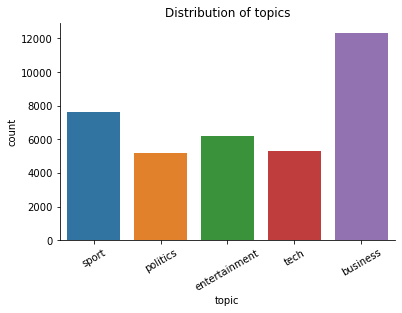

In [154]:
g=sns.countplot(x='topic', data=df_new)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Distribution of topics')
sns.despine()

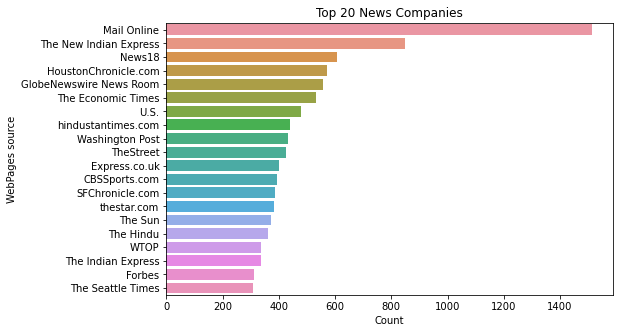

In [155]:
city_count  = df_new['site_name'].value_counts().nlargest(20)
plt.figure(figsize=(8,5))

sns.barplot( x=city_count.values,y=city_count.index, orient='h').set_title('Top 20 News Companies')
plt.xlabel('Count')
plt.ylabel('WebPages source')
plt.show()

----

6. author column is a json; use json.loads on each column, to extract author names, filter the df to only have rows that contain authors.

##### filtering the author name using spacy

In [156]:
def spacy(sen):
    doc = nlp(sen)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            return ent.text
        

In [157]:
df_new['author_']=[spacy(i.strip('][').strip('""')) for i in df_new.author]

<ipython-input-157-79cee1fe71e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['author_']=[spacy(i.strip('][').strip('""')) for i in df_new.author]


In [158]:
df_new[['author_','author']].to_csv('test.csv') #reference

In [159]:
df_final=df_new.drop(columns=['author'],axis=1)
df_final.reset_index(inplace=True, drop = True)
df_final.head()

,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language,author_
0,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,Watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com,en,None
1,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,A few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en,Liz Josaitis
2,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,Perth mother Clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en,None
3,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,Africa Cup of Nations Jonny Evans joined Leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com,en,None
4,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,In late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en,Jake Johnson


------

7. finally, analyze which author publishes where, in what topics, and for top 5 authors, which are commonly used keywords they use in titles and/or full text.

Authors along with their published topics and site

In [160]:
#method 1
li=[]
res1={}
for i in df_final.author_:
    
    if i:
        d={}
        d[i]=df_final[['topic','site_name']][df_final.author_==i].to_dict('list')
        res1.update(d)

In [161]:
res1

{'Liz Josaitis': {'topic': ['politics'], 'site_name': ['The Western Journal']},
 'Jake Johnson': {'topic': ['politics'], 'site_name': ['Truthout']},
 'Christine Favocci': {'topic': ['tech', 'politics', 'entertainment', 'tech'],
  'site_name': ['The Western Journal',
   'The Western Journal',
   'The Western Journal',
   'WND']},
 'Igor Derysh': {'topic': ['business'], 'site_name': ['Truthout']},
 'Sharon Zhang': {'topic': ['business', 'business'],
  'site_name': ['Truthout', 'Truthout']},
 'Bernard J. Wolfson': {'topic': ['business'], 'site_name': ['Truthout']},
 'William Rivers Pitt': {'topic': ['politics'], 'site_name': ['Truthout']},
 'Amy Goodman': {'topic': ['business'], 'site_name': ['Truthout']},
 'Colin Groundwater': {'topic': ['entertainment'], 'site_name': ['GQ']},
 'Cam Wolf': {'topic': ['entertainment'], 'site_name': ['GQ']},
 'Sam Reiss': {'topic': ['tech'], 'site_name': ['GQ']},
 'David Matthews': {'topic': ['sport', 'entertainment', 'business'],
  'site_name': ['nydailyn

In [162]:
#method 2
li=[]
res2={}
for i in df_final.author_:
    
    if i:
        d={}
        d[i]=df_final[['topic','site_name']][df_final.author_==i].to_dict('records')
        res2.update(d)

In [163]:
res2

{'Liz Josaitis': [{'topic': 'politics', 'site_name': 'The Western Journal'}],
 'Jake Johnson': [{'topic': 'politics', 'site_name': 'Truthout'}],
 'Christine Favocci': [{'topic': 'tech', 'site_name': 'The Western Journal'},
  {'topic': 'politics', 'site_name': 'The Western Journal'},
  {'topic': 'entertainment', 'site_name': 'The Western Journal'},
  {'topic': 'tech', 'site_name': 'WND'}],
 'Igor Derysh': [{'topic': 'business', 'site_name': 'Truthout'}],
 'Sharon Zhang': [{'topic': 'business', 'site_name': 'Truthout'},
  {'topic': 'business', 'site_name': 'Truthout'}],
 'Bernard J. Wolfson': [{'topic': 'business', 'site_name': 'Truthout'}],
 'William Rivers Pitt': [{'topic': 'politics', 'site_name': 'Truthout'}],
 'Amy Goodman': [{'topic': 'business', 'site_name': 'Truthout'}],
 'Colin Groundwater': [{'topic': 'entertainment', 'site_name': 'GQ'}],
 'Cam Wolf': [{'topic': 'entertainment', 'site_name': 'GQ'}],
 'Sam Reiss': [{'topic': 'tech', 'site_name': 'GQ'}],
 'David Matthews': [{'top

In [164]:
df_extra=df_final[['author_','site_name','topic']]

In [165]:
#method 3
grouped = df_extra.groupby('author_')

for name,group in grouped:
    
    print (name)
    print("--------------------------------------------------------------------")
    print (group)
    print("--------------------------------------------------------------------\n")
    print("--------------------------------------------------------------------")
    

A. Victoria de Andr\u00e9s
--------------------------------------------------------------------
                         author_         site_name     topic
5535  A. Victoria de Andr\u00e9s  The Conversation  business
--------------------------------------------------------------------

--------------------------------------------------------------------
AMY DKICKINSON
--------------------------------------------------------------------
              author_        site_name          topic
17126  AMY DKICKINSON  JournalStar.com  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
ANDREW TAYLOR
--------------------------------------------------------------------
             author_            site_name     topic
409    ANDREW TAYLOR          Times Union  politics
3448   ANDREW TAYLOR   chicagotribune.com  business
3902   ANDREW TAYLOR     sun-sentinel.com  business
4013   ANDREW TAYLOR 

1209  Alexandra Jaffe   The Age  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Alexandra Kukulka
--------------------------------------------------------------------
                author_           site_name          topic
7330  Alexandra Kukulka  chicagotribune.com  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Alexandra Pastore
--------------------------------------------------------------------
                 author_ site_name topic
32082  Alexandra Pastore       WWD  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Alexandra Topping
--------------------------------------------------------------------
                 author_     site_name     topic
14950  Alexandra Topping  the G

9405  Amber Burton       WSJ  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Amber Peake
--------------------------------------------------------------------
           author_      site_name          topic
12384  Amber Peake  Express.co.uk  entertainment
12393  Amber Peake  Express.co.uk  entertainment
34359  Amber Peake  Express.co.uk  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Amber Randall
--------------------------------------------------------------------
             author_         site_name     topic
36375  Amber Randall  sun-sentinel.com  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Ambuj Kumar
--------------------------------------------------------------------
     

36382  Andrew Billen       NaN  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Andrew Brown
--------------------------------------------------------------------
            author_         site_name     topic
31462  Andrew Brown  Post and Courier  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Andrew Court
--------------------------------------------------------------------
            author_    site_name          topic
6760   Andrew Court  Mail Online          sport
11933  Andrew Court  Mail Online           tech
21731  Andrew Court  Mail Online  entertainment
32466  Andrew Court  Mail Online          sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Andrew Cruden
-----------------------

18822  Anna Patty   The Age  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Anna Pruchnicka
--------------------------------------------------------------------
               author_ site_name topic
34017  Anna Pruchnicka      U.S.  tech
34020  Anna Pruchnicka      U.S.  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Anna Prytz
--------------------------------------------------------------------
          author_       site_name  topic
25178  Anna Prytz  Brisbane Times  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Anna Pulley
--------------------------------------------------------------------
           author_           site_name  topic
13490  Anna Pulley  chicagotribune.com  sport
---

518  Arielle Berger      CNBC  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Arielle Gray
--------------------------------------------------------------------
            author_ site_name          topic
36213  Arielle Gray   Glamour  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Arif Hayat | Dawn.com
--------------------------------------------------------------------
                     author_ site_name     topic
18911  Arif Hayat | Dawn.com  DAWN.COM  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Arnd Wiegmann
--------------------------------------------------------------------
             author_ site_name  topic
19556  Arnd Wiegmann      U.S.  sport
---------------------------

23784  Barbara Vitello  Daily Herald  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Barnaby Lane
--------------------------------------------------------------------
            author_                   site_name  topic
19204  Barnaby Lane  Business Insider Australia  sport
20142  Barnaby Lane  Business Insider Australia   tech
22985  Barnaby Lane  Business Insider Australia  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Barry
--------------------------------------------------------------------
      author_     site_name  topic
13810   Barry  Daily Herald  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Barry Collins
--------------------------------------------------------------------
          

10208  Bill Wagner  baltimoresun.com  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Bill White
--------------------------------------------------------------------
          author_  site_name          topic
23972  Bill White  mcall.com  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Billie Thomson
--------------------------------------------------------------------
              author_    site_name topic
9573   Billie Thomson  Mail Online  tech
19061  Billie Thomson  Mail Online  tech
23739  Billie Thomson  Mail Online  tech
32469  Billie Thomson  Mail Online  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Billy Bambrough
------------------------------------------------------------------

22334  Brian Freedman    Forbes  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Brian Gallagher
--------------------------------------------------------------------
               author_    site_name          topic
412    Brian Gallagher  Mail Online           tech
3227   Brian Gallagher  Mail Online           tech
5338   Brian Gallagher  Mail Online  entertainment
5339   Brian Gallagher  Mail Online  entertainment
16455  Brian Gallagher  Mail Online  entertainment
16598  Brian Gallagher  Mail Online  entertainment
32880  Brian Gallagher  Mail Online          sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Brian Gilmartin
--------------------------------------------------------------------
               author_      site_name     topic
10842  Brian Gilmartin  Seeking Alpha  business
-

            author_ site_name topic
9221  Caitlin Welsh  Mashable  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Callie Craighead
--------------------------------------------------------------------
               author_      site_name  topic
7682  Callie Craighead  seattlepi.com  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Callum Booth
--------------------------------------------------------------------
            author_               site_name topic
33431  Callum Booth  Plugged | The Next Web  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Callum Carson
--------------------------------------------------------------------
             author_     site_name  topic
11515  Callum Carson  Daily 

34445  Cassie Carpenter  Mail Online  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Catalin Cimpanu
--------------------------------------------------------------------
              author_ site_name topic
4231  Catalin Cimpanu     ZDNet  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Catarina Saraiva
--------------------------------------------------------------------
                author_ site_name     topic
31729  Catarina Saraiva       NaN  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Cathalena E. Burch
--------------------------------------------------------------------
                 author_           site_name          topic
7697  Cathalena E. Burch  Arizona Daily Star  en

22947  Chetan Woodun  Seeking Alpha  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Chip Cutter
--------------------------------------------------------------------
           author_ site_name topic
13886  Chip Cutter       WSJ  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Chirag Mehta
--------------------------------------------------------------------
           author_              site_name     topic
8834  Chirag Mehta  The Financial Express  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Chloe Johnson cjohnson@postandcourier.com
--------------------------------------------------------------------
                                         author_         site_name     topic
31482  Chloe

34435  Ciaran McGrath  Express.co.uk  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Cindy Tran
--------------------------------------------------------------------
          author_    site_name     topic
159    Cindy Tran  Mail Online  business
3846   Cindy Tran  Mail Online      tech
16285  Cindy Tran  Mail Online      tech
16293  Cindy Tran  Mail Online      tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Clair Fullarton
--------------------------------------------------------------------
               author_     site_name     topic
10619  Clair Fullarton  Daily Record      tech
25824  Clair Fullarton  Daily Record  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Claire Anderson
---------

11816  Dan Carden dan.carden@nwi.com  nwitimes.com  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Dan Falvey
--------------------------------------------------------------------
         author_      site_name     topic
6084  Dan Falvey  Express.co.uk  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Dan Favale
--------------------------------------------------------------------
          author_        site_name topic
27104  Dan Favale  Bleacher Report  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Dan Heching
--------------------------------------------------------------------
           author_    site_name          topic
520    Dan Heching  Mail Online  entertainment
5322   Dan Heching  M

29565  David Bressan    Forbes  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
David Byrom
--------------------------------------------------------------------
           author_                site_name  topic
23901  David Byrom  Manchester Evening News  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
David Byrom"
--------------------------------------------------------------------
            author_                site_name  topic
23893  David Byrom"  Manchester Evening News  sport
29786  David Byrom"  Manchester Evening News  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
David Campbell
--------------------------------------------------------------------
              author_     site_n


--------------------------------------------------------------------
David Snelling
--------------------------------------------------------------------
              author_      site_name topic
16903  David Snelling  Express.co.uk  tech
33327  David Snelling  Express.co.uk  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
David Thomas
--------------------------------------------------------------------
           author_ site_name          topic
2424  David Thomas      U.S.       business
8932  David Thomas      U.S.  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
David Trainer
--------------------------------------------------------------------
             author_ site_name     topic
29643  David Trainer    Forbes  business
------------------------------------------------------------

1413  Dion Nissenbaum       WSJ  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Diptendu Lahiri
--------------------------------------------------------------------
               author_ site_name     topic
20459  Diptendu Lahiri      U.S.  business
23172  Diptendu Lahiri      U.S.  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Discovery Cube
--------------------------------------------------------------------
             author_ site_name     topic
3424  Discovery Cube       NaN  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Disha Shetty
--------------------------------------------------------------------
           author_ site_name     topic
1459  Disha Shetty    Forbes  business
-

30760  Elliott Jackson           Liverpool Echo  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Elsa Keslassy
--------------------------------------------------------------------
             author_ site_name          topic
21349  Elsa Keslassy   Variety  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Elton Jones
--------------------------------------------------------------------
           author_  site_name topic
26578  Elton Jones  Heavy.com  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Elvira Pollina
--------------------------------------------------------------------
              author_ site_name topic
23320  Elvira Pollina      U.S.  tech
----------------------------------------

14190  Eve Buckland  Mail Online          sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Evelyn Cheng
--------------------------------------------------------------------
            author_ site_name     topic
16592  Evelyn Cheng      CNBC  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Ewan Spence
--------------------------------------------------------------------
          author_ site_name topic
1471  Ewan Spence    Forbes  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
F. Hoffmann-La Roche Ltd
--------------------------------------------------------------------
                        author_                site_name     topic
17955  F. Hoffmann-La Roche Ltd  GlobeNewswire News Room  busin

35670  Genevi\u00e8ve Sicotte  The Conversation  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Geoff Earle
--------------------------------------------------------------------
           author_    site_name     topic
710    Geoff Earle  Mail Online  business
7154   Geoff Earle  Mail Online  business
11926  Geoff Earle  Mail Online  business
21264  Geoff Earle  Mail Online  politics
21737  Geoff Earle  Mail Online  politics
34319  Geoff Earle  Mail Online  business
--------------------------------------------------------------------

--------------------------------------------------------------------
George Dagnino
--------------------------------------------------------------------
              author_      site_name     topic
12751  George Dagnino  Seeking Alpha  business
--------------------------------------------------------------------

---------------------------------------------

17338  Hamilton Advertiser  Daily Record  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Hamish Hastie
--------------------------------------------------------------------
             author_                  site_name     topic
18394  Hamish Hastie  The Sydney Morning Herald  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Hamsini Karthik
--------------------------------------------------------------------
               author_ site_name     topic
23988  Hamsini Karthik       NaN  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Hamza Khan
--------------------------------------------------------------------
          author_           site_name     topic
11284  Hamza Khan  The Indian

35698  Imtiaz Ali  DAWN.COM  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Indivjal Dhasmana
--------------------------------------------------------------------
                 author_ site_name     topic
20620  Indivjal Dhasmana       NaN  business
23996  Indivjal Dhasmana       NaN  politics
28908  Indivjal Dhasmana       NaN  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Inga Saffron
--------------------------------------------------------------------
            author_                 site_name          topic
10398  Inga Saffron  https://www.inquirer.com  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Inhibikase Therapeutics
--------------------------------------------------

32465  Jack Wright  Mail Online       business
--------------------------------------------------------------------

--------------------------------------------------------------------
Jackson Barron
--------------------------------------------------------------------
              author_    site_name          topic
9143   Jackson Barron  Mail Online           tech
18276  Jackson Barron  Mail Online  entertainment
21247  Jackson Barron  Mail Online          sport
25288  Jackson Barron  Mail Online           tech
28647  Jackson Barron  Mail Online           tech
33004  Jackson Barron  Mail Online  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Jacky Wong
--------------------------------------------------------------------
          author_ site_name topic
18114  Jacky Wong       WSJ  tech
--------------------------------------------------------------------

-----------------------

35090  James Rodger  BirminghamLive           tech
--------------------------------------------------------------------

--------------------------------------------------------------------
James Rodger"
--------------------------------------------------------------------
             author_       site_name topic
18534  James Rodger"  BirminghamLive  tech
19000  James Rodger"  BirminghamLive  tech
28106  James Rodger"  BirminghamLive  tech
30035  James Rodger"     WalesOnline  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
James Roemer
--------------------------------------------------------------------
            author_      site_name     topic
30457  James Roemer  Seeking Alpha  business
--------------------------------------------------------------------

--------------------------------------------------------------------
James Schiff
-------------------------------------------------

32755  Jazz Tangcay   Variety  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Jean Paul Paulynice
--------------------------------------------------------------------
                   author_ site_name topic
18165  Jean Paul Paulynice    Forbes  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Jeanette Chabalala
--------------------------------------------------------------------
                  author_ site_name     topic
24774  Jeanette Chabalala    News24  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Jeanne Phillips
--------------------------------------------------------------------
               author_ site_name          topic
1113   Jeanne Phillips    SFGATE       politics
24

12894  Jessica Kerwin     Vogue  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Jessica Knibbs
--------------------------------------------------------------------
              author_      site_name     topic
7123   Jessica Knibbs  Express.co.uk      tech
14271  Jessica Knibbs  Express.co.uk  business
21830  Jessica Knibbs  Express.co.uk  politics
34380  Jessica Knibbs  Express.co.uk  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Jessica McBride
--------------------------------------------------------------------
               author_  site_name          topic
23180  Jessica McBride  Heavy.com       business
23183  Jessica McBride  Heavy.com       business
31704  Jessica McBride  Heavy.com           tech
31711  Jessica McBride  Heavy.com  entertainment
----------------------------------

11122  John Hayward  Breitbart  business
--------------------------------------------------------------------

--------------------------------------------------------------------
John Holloway
--------------------------------------------------------------------
             author_ site_name  topic
17481  John Holloway   The Age  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
John Hopewell
--------------------------------------------------------------------
             author_ site_name          topic
21369  John Hopewell   Variety  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
John Hughes
--------------------------------------------------------------------
           author_           site_name     topic
11043  John Hughes  Arizona Daily Star  politics
-----------------------------

35083  Joseph Chapman  BirminghamLive  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Joseph DeAcetis
--------------------------------------------------------------------
              author_ site_name          topic
1481  Joseph DeAcetis    Forbes  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Joseph Farah
--------------------------------------------------------------------
           author_ site_name  topic
3882  Joseph Farah       WND  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Joseph Green
--------------------------------------------------------------------
            author_ site_name topic
17758  Joseph Green  Mashable  tech
---------------------------------------------------

7318  Kaitlin Edquist  chicagotribune.com  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Kale Wilk
--------------------------------------------------------------------
         author_     site_name topic
11831  Kale Wilk  nwitimes.com  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Kaley Roshitsh
--------------------------------------------------------------------
              author_ site_name topic
17488  Kaley Roshitsh       WWD  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Kali
--------------------------------------------------------------------
      author_ site_name     topic
12982    Kali       WWD  business
--------------------------------------------------------------------

-

32615  Kaveel Singh    News24       politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Kaya Burgess
--------------------------------------------------------------------
           author_ site_name  topic
3043  Kaya Burgess       NaN  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Kayleigh Padar
--------------------------------------------------------------------
            author_     site_name topic
599  Kayleigh Padar  Daily Herald  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Kayode Omotosho
--------------------------------------------------------------------
               author_      site_name     topic
22097  Kayode Omotosho  Seeking Alpha  business
---------------------------------------

19996  Klee A  GlobeNewswire News Room  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Kombucha Town
--------------------------------------------------------------------
             author_ site_name     topic
28798  Kombucha Town       NaN  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Korin Miller
--------------------------------------------------------------------
            author_                                          site_name  topic
7412   Korin Miller  Parade: Entertainment, Recipes, Health, Life, ...   tech
28248  Korin Miller  Parade: Entertainment, Recipes, Health, Life, ...  sport
28253  Korin Miller  Parade: Entertainment, Recipes, Health, Life, ...  sport
--------------------------------------------------------------------

--------------------------------------------

30643  Leona Greenan  Daily Record           tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Leroy Leo
--------------------------------------------------------------------
         author_ site_name     topic
4308   Leroy Leo      mint  business
24060  Leroy Leo      mint  business
27224  Leroy Leo      mint  business
29402  Leroy Leo      mint      tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Les Bowen
--------------------------------------------------------------------
        author_                 site_name  topic
6749  Les Bowen  https://www.inquirer.com  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Leslie Albrecht
--------------------------------------------------------------------
       

33698  Lucy Needham          mirror           tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Lucy Stone
--------------------------------------------------------------------
         author_                  site_name     topic
9037  Lucy Stone  The Sydney Morning Herald  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Luis Andres
--------------------------------------------------------------------
           author_ site_name          topic
11697  Luis Andres      WPLG  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Luisa Zargani
--------------------------------------------------------------------
             author_ site_name     topic
12980  Luisa Zargani       WWD  business
17491  Lui

16943  Mark J. Grant  Seeking Alpha  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Mark Jones
--------------------------------------------------------------------
          author_         site_name          topic
27681  Mark Jones  Post and Courier  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Mark Joyella
--------------------------------------------------------------------
            author_ site_name          topic
22428  Mark Joyella    Forbes  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Mark Kantrowitz
--------------------------------------------------------------------
               author_ site_name     topic
1487   Mark Kantrowitz    Forbes  politics
14948  Mark 

7558  Matt Oliver  Mail Online  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Matt Stewart
--------------------------------------------------------------------
            author_      site_name     topic
12771  Matt Stewart  Seeking Alpha  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Matt Vespa
--------------------------------------------------------------------
          author_  site_name     topic
7283   Matt Vespa  Townhall   politics
14941  Matt Vespa  Townhall   politics
14946  Matt Vespa  Townhall      sport
32736  Matt Vespa  Townhall   politics
33789  Matt Vespa  Townhall   politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Matt Young
---------------------------------------------

2961  Michael Marot  nwitimes.com  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Michael Minson
--------------------------------------------------------------------
             author_ site_name     topic
5475  Michael Minson       NaN  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Michael Moynihan
--------------------------------------------------------------------
                author_       site_name  topic
16416  Michael Moynihan  Irish Examiner  sport
16728  Michael Moynihan  Irish Examiner  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Michael Pringle
--------------------------------------------------------------------
               author_     site_name          topic
18017  Micha

23393  Monicah Mwangi      U.S.  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Monika Cvorak
--------------------------------------------------------------------
             author_     site_name     topic
31388  Monika Cvorak  the Guardian  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Monika Halan
--------------------------------------------------------------------
           author_ site_name     topic
4405  Monika Halan      mint  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Morgan McFall-Johnsen
--------------------------------------------------------------------
                     author_                   site_name          topic
35983  Morgan McFall-Johnsen  Business Inside

30297  Nick Fierro  mcall.com  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Nick First
--------------------------------------------------------------------
         author_      site_name     topic
6763  Nick First  Seeking Alpha  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Nick Masuda
--------------------------------------------------------------------
           author_         site_name     topic
3408   Nick Masuda  Post and Courier  business
12506  Nick Masuda  Post and Courier  politics
27717  Nick Masuda  Post and Courier     sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Nick Sargen
--------------------------------------------------------------------
           author_ site_name    

34527  Pamela Wood  baltimoresun.com  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Pan Pylas
--------------------------------------------------------------------
        author_                  site_name     topic
875   Pan Pylas  The Sydney Morning Herald     sport
5628  Pan Pylas   Colorado Springs Gazette  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Panday
--------------------------------------------------------------------
      author_ site_name     topic
22488  Panday      mint      tech
29300  Panday      mint  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Pandora Amoratis
--------------------------------------------------------------------
               author_    site_nam

28671  Peter Schacknow      CNBC  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Peter Swanson
--------------------------------------------------------------------
             author_     site_name          topic
23498  Peter Swanson  the Guardian  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Peter Wells
--------------------------------------------------------------------
           author_                  site_name          topic
27568  Peter Wells  The Sydney Morning Herald  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Peter White
--------------------------------------------------------------------
           author_ site_name          topic
35990  Peter White  Deadline 

31278  Rafael Olmeda  sun-sentinel.com  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Raghu Mohan
--------------------------------------------------------------------
          author_ site_name     topic
3618  Raghu Mohan       NaN  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Ragini Saxena
--------------------------------------------------------------------
             author_ site_name     topic
17913  Ragini Saxena       NaN  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Rajmohan Gandhi
--------------------------------------------------------------------
              author_           site_name     topic
6128  Rajmohan Gandhi  The Indian Express  politics
-----------------------

35614  Ritu Sharma  The Indian Express  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Rob Cox
--------------------------------------------------------------------
       author_ site_name     topic
32039  Rob Cox      U.S.  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Rob Davies
--------------------------------------------------------------------
          author_     site_name     topic
31354  Rob Davies  the Guardian  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Rob Dube
--------------------------------------------------------------------
        author_ site_name     topic
14972  Rob Dube    Forbes  business
--------------------------------------------------------------------

---

32057  Ryan Murphy  dailypress.com  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Ryan O'Neill
--------------------------------------------------------------------
            author_    site_name  topic
18581  Ryan O'Neill  WalesOnline  sport
21573  Ryan O'Neill  WalesOnline   tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Ryan Parry
--------------------------------------------------------------------
          author_    site_name          topic
14129  Ryan Parry  Mail Online  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Ryan Pownall
--------------------------------------------------------------------
            author_     site_name topic
17295  Ryan Pownall  Entrepreneur  tech
-----

20957  Sarah Fallon     Wired  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Sarah Fielding
--------------------------------------------------------------------
              author_                   site_name topic
35998  Sarah Fielding  Business Insider Australia  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Sarah Firshein
--------------------------------------------------------------------
              author_           site_name     topic
15390  Sarah Firshein    baltimoresun.com  business
32065  Sarah Firshein      dailypress.com  business
34275  Sarah Firshein  chicagotribune.com  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Sarah Freishtat
-------------------------------------------

34666  Shelby Stewart     Chron  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Shelley Zalis
--------------------------------------------------------------------
             author_ site_name     topic
12868  Shelley Zalis    Forbes  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Sheryl DeVore
--------------------------------------------------------------------
            author_           site_name          topic
1172  Sheryl DeVore  chicagotribune.com  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Shilpa Jamkhandikar
--------------------------------------------------------------------
                   author_ site_name     topic
23213  Shilpa Jamkhandikar      U.S.  business


19063  Soprano Oyj  GlobeNewswire News Room  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Spencer Kornhaber
--------------------------------------------------------------------
                 author_     site_name          topic
15075  Spencer Kornhaber  The Atlantic  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Spencer Morgan
--------------------------------------------------------------------
              author_    site_name  topic
11291  Spencer Morgan  Mail Online  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Stacey Dutton
--------------------------------------------------------------------
             author_       site_name topic
25784  Stacey Dutton  BirminghamLive  te

29371  Steven Fiorillo  Seeking Alpha  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Steven M.  Sipple
--------------------------------------------------------------------
                author_        site_name  topic
5993  Steven M.  Sipple  JournalStar.com  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Steven M. Galbraith
--------------------------------------------------------------------
                   author_ site_name          topic
13890  Steven M. Galbraith       WSJ  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Steven M. Lieberman
--------------------------------------------------------------------
                  author_  site_name     topic
2197  Steven M. Lieberm

32825  Thomas Fuller  chicagotribune.com  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Thomas Macaulay
--------------------------------------------------------------------
               author_              site_name topic
15123  Thomas Macaulay  Neural | The Next Web  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Thomas Mitchell
--------------------------------------------------------------------
              author_                  site_name          topic
6949  Thomas Mitchell  The Sydney Morning Herald  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Thomas Molloy
--------------------------------------------------------------------
             author_                site_name t

10199  Tom Zirpoli  baltimoresun.com/maryland/carroll  business
--------------------------------------------------------------------

--------------------------------------------------------------------
Tomas Hill Lopez-menchero
--------------------------------------------------------------------
                         author_    site_name  topic
9295   Tomas Hill Lopez-menchero  Mail Online  sport
10074  Tomas Hill Lopez-menchero  Mail Online  sport
19560  Tomas Hill Lopez-menchero  Mail Online   tech
21807  Tomas Hill Lopez-menchero  Mail Online  sport
34379  Tomas Hill Lopez-menchero  Mail Online  sport
--------------------------------------------------------------------

--------------------------------------------------------------------
Tommy Beer
--------------------------------------------------------------------
          author_ site_name          topic
14988  Tommy Beer    Forbes          sport
22464  Tommy Beer    Forbes  entertainment
------------------------------------

29676  Wayne G. McDonnell    Forbes  entertainment
--------------------------------------------------------------------

--------------------------------------------------------------------
Wendy Liberatore
--------------------------------------------------------------------
               author_    site_name     topic
7048  Wendy Liberatore  Times Union  politics
--------------------------------------------------------------------

--------------------------------------------------------------------
Wes Jernigan
--------------------------------------------------------------------
            author_           site_name topic
11040  Wes Jernigan  Arizona Daily Star  tech
--------------------------------------------------------------------

--------------------------------------------------------------------
Wes Parnell
--------------------------------------------------------------------
           author_        site_name          topic
12686  Wes Parnell  nydailynews.com  entertainme

-------

Analysing top 5 authors

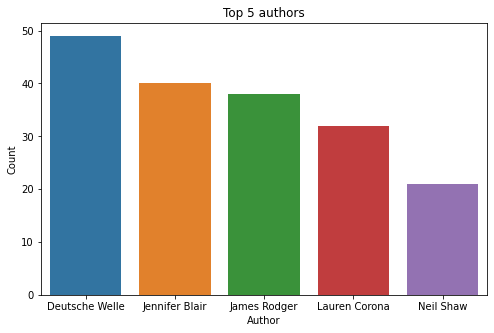

In [166]:
c  = df_final['author_'].value_counts().nlargest(5)
plt.figure(figsize=(8,5))

sns.barplot( x=c.index,y=c.values).set_title('Top 5 authors')
plt.ylabel('Count')
plt.xlabel('Author')
plt.show()

In [167]:
a=list(df_final.author_.value_counts().nlargest(5).index)

Top 20 commonly used keywords for each author

In [168]:
for i in a:
    Text=""
    Text=' '.join(df_final['full_text'][df_final.author_==i])
    print(i)
    keyword_extraction(Text,20,i)


Deutsche Welle
['german', 'year', 'covid', 'coronavirus', 'said', 'new', 'people', 'time', 'country', 'teaching', 'government', 'germany', 'news', 'vaccine', 'dw', 'say', 'one', 'million', 'christmas', 'since'] 

Jennifer Blair
['butter', 'best', 'paint', 'bathroom', 'dish', 'need', 'bestreviews', 'work', 'find', 'cleaner', 'deep', 'one', 'use', 'top', 'disinfecting', 'temperature', 'fry', 'thermometer', 'food', 'acrylic'] 

James Rodger
['use', 'newsletter', 'related', 'service', 'time', 'offer', 'data', 'subscribe', 'information', 'provide', 'send', 'sometimes', 'include', 'recommendation', 'ourprivacy', 'noticeexplains', 'right', 'unsubscribe', 'christmas', 'new'] 

Lauren Corona
['tree', 'family', 'life', 'christmas', 'pajama', 'insurance', 'wrap', 'need', 'mattress', 'best', 'bestreviews', 'choosing', 'time', 'day', 'top', 'advertisement', 'pick', 'policy', 'right', 'offer'] 

Neil Shaw
['newsletter', 'use', 'related', 'service', 'new', 'daily', 'email', 'data', 'right', 'time', '

In [169]:
def keyword_extraction(Text,n,i):
    corpus = []

    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', Text)

    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    ps=PorterStemmer()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  stop_words] 
    text = " ".join(text)
    corpus.append(text)
    
    #vectorising
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_words= words_freq[:n]
    
    #visualising using seabor bar plot
    top_df = pd.DataFrame(top_words)
    top_df.columns=["Word", "Freq"]
    print(list(top_df['Word']),"\n")

    #sns.set(rc={'figure.figsize':(18,8)})
    #g = sns.barplot(x="Word", y="Freq", data=top_df).set_title(i)
   

-----
----